# Vector Nomenclature
Points in 3D space shall be given unique names: \$A\$, \$B\$, etc.

Coordinate frames shall be given unique names: \$F\$, \$G\$, etc.
The origin of frame \$F\$, when expressed as a point, is simply \$F\$.

Position vector notion matches Stevens & Lewis. That is, the position vector of point \$B\$ with respect to point \$A\$ expressed in frame \$F\$ is:

$$
\vec{r}^F_{B/A} \equiv X^F_{B/A}\vec{i}^F + Y^F_{B/A}\vec{j}^F + Z^F_{B/A}\vec{k}^F \equiv r^F_{x_{B/A}}\vec{i}^F + r^F_{y_{B/A}}\vec{j}^F + r^F_{z_{B/A}}\vec{k}^F
$$

Symbol | Variable
---|---
\$\vec{r}^F_{B/A}\$ | `trueAtoBposF`
\$r^F_{x_{B/A}} \equiv X^F_{B/A}\$ | `trueAtoBposFx`
\$r^F_{y_{B/A}} \equiv Y^F_{B/A}\$ | `trueAtoBposFy`
\$r^F_{z_{B/A}} \equiv Z^F_{B/A}\$ | `trueAtoBposFz`

If the point from which the position is measured is equal to the origin of the frame in which the vector is expressed, it need not be called out explicitly:

$$
\vec{r}^F_{B/F} \equiv \vec{r}^F_B
$$

Symbol | Variable
---|---
\$\vec{r}^F_B\$ | `trueBPosF`
\$r^F_{x_{B}} \equiv X^F_{B}\$ | `trueBposFx`
\$r^F_{y_{B}} \equiv Y^F_{B}\$ | `trueBposFy`
\$r^F_{z_{B}} \equiv Z^F_{B}\$ | `trueBposFz`

Expressing unit vectors in their own frame is easy. For example, the 1st unit vector (the position of a point at 1.0 units along the \$X\$ axis with respect to the origin of the \$F\$ frame expressed in frame \$F\$ is:

$$
\vec{i}^F \equiv \vec{i}^F_{X/F}
$$

Symbol | Variable
---|---
\$\vec{i}^F\$ | `trueFxUnitVec`
\$\vec{j}^F\$ | `trueFyUnitVec`
\$\vec{k}^F\$ | `trueFzUnitVec`

Expressing them in another frame requires some additional language. The same vectors, expressed in frame \$G\$, are:

Symbol | Variable
---|---
\$\vec{i}^G_{X/F}\$ | `trueFxUnitVecG`
\$\vec{j}^G_{Y/F}\$ | `trueFyUnitVecG`
\$\vec{k}^G_{Z/F}\$ | `trueFzUnitVecG`

# Coordinate Frames

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

iUnitVec = np.array([[1],[0],[0]])
jUnitVec = np.array([[0],[1],[0]])
kUnitVec = np.array([[0],[0],[1]])

In [52]:
# Setup BaseNED origin and coordinate frame
trueBaseNEDxUnitVec = iUnitVec
trueBaseNEDyUnitVec = jUnitVec
trueBaseNEDzUnitVec = kUnitVec

## Body Frame (B)
The origin of this frame is the center of gravity (CG) of the flight vehicle. The position and attitude of this coordinate frame relative to others like **BaseNED (N)** will change over the course of flight.

Initialize with a position and orientation offset relative to **BaseNED (N)**

Symbol | Variable
---|---
\$\vec{r}^N_B\$ | trueBodyPosBaseNED
\$\tilde{T}_{B/N}\$ | trueRotBodyFromBaseNED
\$\tilde{T}_{N/B}\$ | trueRotBaseNEDfromBody

In [53]:
# Setup Body origin and coordinate frame
trueBodyXunitVec = iUnitVec
trueBodyYunitVec = jUnitVec
trueBodyZunitVec = kUnitVec

trueBodyPosBaseNED = np.array([[-3],[1],[0]])

from scipy.spatial.transform import Rotation as R
r = R.from_euler('y', -30, degrees=True)
trueRotBodyFromBaseNED = r.as_matrix()
print(trueRotBodyFromBaseNED)
trueRotBaseNEDfromBody = trueRotBodyFromBaseNED.transpose()

trueBodyXunitVecBaseNED = trueRotBaseNEDfromBody@trueBodyXunitVec
trueBodyYunitVecBaseNED = trueRotBaseNEDfromBody@trueBodyYunitVec
trueBodyZunitVecBaseNED = trueRotBaseNEDfromBody@trueBodyZunitVec

[[ 0.8660254 -0.        -0.5      ]
 [ 0.         1.        -0.       ]
 [ 0.5        0.         0.8660254]]


In [54]:
# Apparently, matrix math in numpy requires the @ operator, not the * operator
print(trueRotBaseNEDfromBody)
print(trueBodyXunitVec)
print(trueRotBaseNEDfromBody*trueBodyXunitVec)
print(np.matmul(trueRotBaseNEDfromBody,trueBodyXunitVec))
print(trueRotBaseNEDfromBody@trueBodyXunitVec)

[[ 0.8660254  0.         0.5      ]
 [-0.         1.         0.       ]
 [-0.5       -0.         0.8660254]]
[[1]
 [0]
 [0]]
[[ 0.8660254  0.         0.5      ]
 [-0.         0.         0.       ]
 [-0.        -0.         0.       ]]
[[ 0.8660254]
 [ 0.       ]
 [-0.5      ]]
[[ 0.8660254]
 [ 0.       ]
 [-0.5      ]]


## Station Frame (S)
The origin of this frame is a fixed point on the body of the flight vehicle. We track this frame separately from **Body (B)** because the origin of that frame, the center of gravity (CG), may move in flight as fuel is consumed. We also allow a rotational offset between this frame and **Body (B)** for maximum flexbility.

Initialize with a position and orientation offset relative to **Body (B)**. Calculate that position and orientation offset with respect to the **BaseNED (N)** frame:

$$
\vec{r}^N_S = \vec{r}^N_{S/N} = \vec{r}^N_{S/B} + \vec{r}^N_{B/N} = \tilde{T}_{N/B}\vec{r}^B_{S/B} + \vec{r}^N_{B/N} = \tilde{T}_{N/B}\vec{r}^B_S + \vec{r}^N_B
$$

$$
\tilde{T}_{N/S} = \tilde{T}_{N/B}\tilde{T}_{B/S}
$$

Symbol | Variable
---|---
\$\vec{r}^B_S=\vec{r}^B_{S/B}\$ | trueStationPosBody
\$\vec{r}^N_S=\vec{r}^N_{S/N}\$ | trueStationPosBaseNED
\$\vec{r}^N_{S/B}\$ | trueBodyToStationPosBaseNED
\$\tilde{T}_{S/B}\$ | trueRotStationFromBody
\$\tilde{T}_{B/S}\$ | trueRotBodyFromStation
\$\tilde{T}_{N/S}\$ | trueRotBaseNEDfromStation

Also, calculate the opposite position offset vector. The location of the **Body (B)** origin in the **Station (S)** frame:

$$
\vec{r}^S_B = \vec{r}^S_{B/S} = \tilde{T}_{S/B}\vec{r}^B_{B/S} = \tilde{T}_{S/B}(-\vec{r}^B_{S/B}) = -\tilde{T}_{S/B}\vec{r}^B_S
$$

Symbol | Variable
---|---
\$\vec{r}^S_B=\vec{r}^S_{B/S}\$ | trueBodyPosStation
\$\vec{r}^B_{B/S}\$ | trueStationToBodyPosBody

In [55]:
# Setup Station origin and coordinate frame
trueStationXunitVec = iUnitVec
trueStationYunitVec = jUnitVec
trueStationZunitVec = kUnitVec

trueStationPosBody = np.array([[4],[0],[0]])
trueStationPosBaseNED = trueRotBaseNEDfromBody@trueStationPosBody + trueBodyPosBaseNED

from scipy.spatial.transform import Rotation as R
r = R.from_euler('y', 180, degrees=True)
trueRotStationFromBody = r.as_matrix()
print(trueRotStationFromBody)
trueRotBodyFromStation = trueRotStationFromBody.transpose()
trueRotBaseNEDfromStation = trueRotBaseNEDfromBody@trueRotBodyFromStation

trueBodyPosStation = -trueRotStationFromBody@trueStationPosBody
print(trueBodyPosStation)

trueStationXunitVecBaseNED = trueRotBaseNEDfromStation@trueStationXunitVec
trueStationYunitVecBaseNED = trueRotBaseNEDfromStation@trueStationYunitVec
trueStationZunitVecBaseNED = trueRotBaseNEDfromStation@trueStationZunitVec

[[-1.0000000e+00  0.0000000e+00  1.2246468e-16]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [-1.2246468e-16  0.0000000e+00 -1.0000000e+00]]
[[4.0000000e+00]
 [0.0000000e+00]
 [4.8985872e-16]]


## GimbalHousing Frame (H)
This coordinate frame tracks how the stationary part of the gimbal is mounted onto the airframe. The origin is at the center of rotation of the gimbal, which is almost never the origin of the **Body (B)** or **Station (S)** frames.

Initialize with a position and orientation offset relative to **Station (S)**. Calculate that position and orientation offset with respect to the **BaseNED (N)** frame:

$$
\vec{r}^N_H = \vec{r}^N_{H/N} = \vec{r}^N_{H/S}+\vec{r}^N_{S/B}+\vec{r}^N_{B/N} = \vec{r}^N_{H/S}-\vec{r}^N_{B/S}+\vec{r}^N_{B/N} = \tilde{T}_{N/S}\vec{r}^S_{H/S}-\tilde{T}_{N/S}\vec{r}^S_{B/S}+\vec{r}^N_{B/N} = \tilde{T}_{N/S}\vec{r}^S_H-\tilde{T}_{N/S}\vec{r}^S_B+\vec{r}^N_B = \tilde{T}_{N/S}(\vec{r}^S_H-\vec{r}^S_B)+\vec{r}^N_B
$$

$$
\tilde{T}_{N/H} = \tilde{T}_{N/B}\tilde{T}_{B/S}\tilde{T}_{S/H}
$$

Symbol | Variable
---|---
\$\vec{r}^S_H=\vec{r}^S_{H/S}\$ | trueGimbalHousingPosStation
\$\vec{r}^N_H=\vec{r}^N_{H/N}\$ | trueGimbalHousingPosBaseNED
\$\vec{r}^N_{H/S}\$ | trueStationToGimbalHousingPosBaseNED
\$\vec{r}^N_{S/B}\$ | trueBodyToStationPosBaseNED
\$\vec{r}^N_{B/S}\$ | trueStationToBodyPosBaseNED
\$\tilde{T}_{H/S}\$ | trueRotGimbalHousingFromStation
\$\tilde{T}_{S/H}\$ | trueRotStationFromGimbalHousing

In [56]:
# Setup GimbalHousing origin and coordinate frame
trueGimbalHousingXunitVec = iUnitVec
trueGimbalHousingYunitVec = jUnitVec
trueGimbalHousingZunitVec = kUnitVec

trueGimbalHousingPosStation = np.array([[1.5],[0],[0]])
trueGimbalHousingPosBaseNED = trueRotBaseNEDfromStation@(trueGimbalHousingPosStation - trueBodyPosStation) + trueBodyPosBaseNED

from scipy.spatial.transform import Rotation as R
r = R.from_euler('yz', [180, 30], degrees=True)
trueRotGimbalHousingFromStation = r.as_matrix()
print(trueRotGimbalHousingFromStation)
trueRotStationFromGimbalHousing = trueRotGimbalHousingFromStation.transpose()
trueRotBaseNEDfromGimbalHousing = trueRotBaseNEDfromBody@trueRotBodyFromStation@trueRotStationFromGimbalHousing

trueGimbalHousingXunitVecBaseNED = trueRotBaseNEDfromGimbalHousing@trueGimbalHousingXunitVec
trueGimbalHousingYunitVecBaseNED = trueRotBaseNEDfromGimbalHousing@trueGimbalHousingYunitVec
trueGimbalHousingZunitVecBaseNED = trueRotBaseNEDfromGimbalHousing@trueGimbalHousingZunitVec

[[-8.66025404e-01 -5.00000000e-01  1.06057524e-16]
 [-5.00000000e-01  8.66025404e-01  6.12323400e-17]
 [-1.22464680e-16  0.00000000e+00 -1.00000000e+00]]


## Target (T)
Initialized with a position offset relative to **BaseNED (N)**

$$
\vec{r}^N_T
$$

Calculating position vectors from the origins of other coordinate frames to the **Target (T)**:

$$
\vec{r}^N_{T/B} = \vec{r}^N_{T/N} + \vec{r}^N_{N/B} = \vec{r}^N_{T/N} - \vec{r}^N_{B/N} = \vec{r}^N_T - \vec{r}^N_B
$$
$$
\vec{r}^N_{T/S} = \vec{r}^N_{T/N} + \vec{r}^N_{N/S} = \vec{r}^N_{T/N} - \vec{r}^N_{S/N} = \vec{r}^N_T - \vec{r}^N_S
$$
$$
\vec{r}^N_{T/H} = \vec{r}^N_{T/N} + \vec{r}^N_{N/H} = \vec{r}^N_{T/N} - \vec{r}^N_{H/N} = \vec{r}^N_T - \vec{r}^N_H
$$

Symbol | Variable
---|---
\$\vec{r}^N_T=\vec{r}^N_{T/N}\$ | trueTgtPosBaseNED
\$\vec{r}^N_{T/B}\$ | trueBodyToTgtPosBaseNED
\$\vec{r}^N_{T/S}\$ | trueStationToTgtPosBaseNED
\$\vec{r}^N_{N/B}\$ | trueBodyToBaseNEDposBaseNED
\$\vec{r}^N_{N/S}\$ | trueStationToBaseNEDposBaseNED

In [68]:
# Setup Target position
trueTgtPosBaseNED = np.array([[1],[-2],[2]])
trueBodyToTgtPosBaseNED = trueTgtPosBaseNED - trueBodyPosBaseNED
trueStationToTgtPosBaseNED = trueTgtPosBaseNED - trueStationPosBaseNED
trueGimbalHousingToTgtPosBaseNED = trueTgtPosBaseNED - trueGimbalHousingPosBaseNED

## GimbalPlatform Frame (G)
This coordinate frame tracks how the rotating part of the gimbal (which often has something like a sensor mounted to it) is oriented relative to the **GimbalHousing (H)** frame. By definition, the origin of this frame is collocated with the origin of the **GimbalHousing (H)** frame at the center of rotation of the gimbal platform. That is, in any frame \$F\$:

$$
\vec{r}^F_G \equiv \vec{r}^F_H
$$


Symbol | Variable
---|---
\$\vec{r}^F_G = \vec{r}^F_H\$ | trueGimbalHousingPosF = trueGimbalPlatformPosF = trueGimbalPosF

There can be an angular offset between this frame and the **GimbalHousing (H)** frame:

Symbol | Variable
---|---
\$\tilde{T}_{G/H}\$ | trueRotGimbalPlatformFromGimbalHousing
\$\tilde{T}_{H/G}\$ | trueRotGimbalHousingFromGimbalPlatform

Tracking this angular offset is the purpose of any gimbal model (any model that extends the `Gimbal` base class.

## Stuck Gimbal
Consider a mathematically simple, although tactically useless, gimbal model in which the **GimbalPlatform (G)** is stuck at a fixed orientation a few degrees away from boresight of the **GimbalHousing (H)** frame in both azimuth and elevation.

In [69]:
# Setup GimbalPlatform coordinate frame
trueGimbalPlatformXunitVec = iUnitVec
trueGimbalPlatformYunitVec = jUnitVec
trueGimbalPlatformZunitVec = kUnitVec

trueGimbalPlatformPosStation = trueGimbalHousingPosStation
trueGimbalPlatformPosBaseNED = trueGimbalHousingPosBaseNED

from scipy.spatial.transform import Rotation as R
r = R.from_euler('yz', [15, 10], degrees=True)
trueRotGimbalPlatformFromGimbalHousing = r.as_matrix()
print(trueRotGimbalHousingFromStation)
trueRotGimbalHousingFromGimbalPlatform = trueRotGimbalPlatformFromGimbalHousing.transpose()
trueRotBaseNEDfromGimbalPlatform = trueRotBaseNEDfromGimbalHousing@trueRotGimbalHousingFromGimbalPlatform

trueGimbalPlatformXunitVecBaseNED = trueRotBaseNEDfromGimbalPlatform@trueGimbalPlatformXunitVec
trueGimbalPlatformYunitVecBaseNED = trueRotBaseNEDfromGimbalPlatform@trueGimbalPlatformYunitVec
trueGimbalPlatformZunitVecBaseNED = trueRotBaseNEDfromGimbalPlatform@trueGimbalPlatformZunitVec

[[-8.66025404e-01 -5.00000000e-01  1.06057524e-16]
 [-5.00000000e-01  8.66025404e-01  6.12323400e-17]
 [-1.22464680e-16  0.00000000e+00 -1.00000000e+00]]


<IPython.core.display.Javascript object>


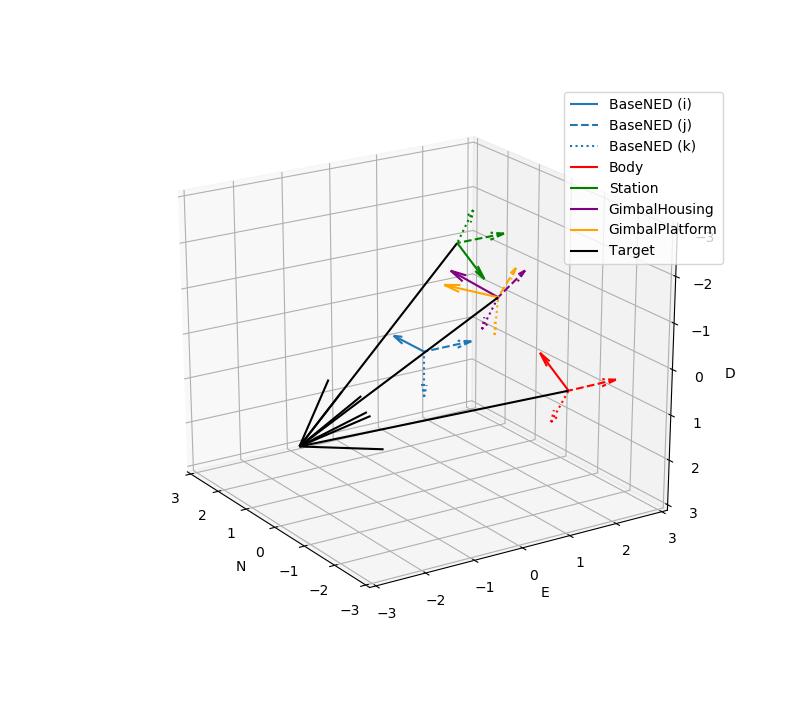

In [70]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.quiver(0,0,0,trueBaseNEDxUnitVec[0],trueBaseNEDxUnitVec[1],trueBaseNEDxUnitVec[2],label='BaseNED (i)')
ax.quiver(0,0,0,trueBaseNEDyUnitVec[0],trueBaseNEDyUnitVec[1],trueBaseNEDyUnitVec[2],label='BaseNED (j)',ls='--')
ax.quiver(0,0,0,trueBaseNEDzUnitVec[0],trueBaseNEDzUnitVec[1],trueBaseNEDzUnitVec[2],label='BaseNED (k)',ls=':')
ax.quiver(trueBodyPosBaseNED[0],trueBodyPosBaseNED[1],trueBodyPosBaseNED[2],trueBodyXunitVecBaseNED[0],trueBodyXunitVecBaseNED[1],trueBodyXunitVecBaseNED[2],color='red',label='Body')
ax.quiver(trueBodyPosBaseNED[0],trueBodyPosBaseNED[1],trueBodyPosBaseNED[2],trueBodyYunitVecBaseNED[0],trueBodyYunitVecBaseNED[1],trueBodyYunitVecBaseNED[2],color='red',ls='--')
ax.quiver(trueBodyPosBaseNED[0],trueBodyPosBaseNED[1],trueBodyPosBaseNED[2],trueBodyZunitVecBaseNED[0],trueBodyZunitVecBaseNED[1],trueBodyZunitVecBaseNED[2],color='red',ls=':')
ax.quiver(trueStationPosBaseNED[0],trueStationPosBaseNED[1],trueStationPosBaseNED[2],trueStationXunitVecBaseNED[0],trueStationXunitVecBaseNED[1],trueStationXunitVecBaseNED[2],color='green',label='Station')
ax.quiver(trueStationPosBaseNED[0],trueStationPosBaseNED[1],trueStationPosBaseNED[2],trueStationYunitVecBaseNED[0],trueStationYunitVecBaseNED[1],trueStationYunitVecBaseNED[2],color='green',ls='--')
ax.quiver(trueStationPosBaseNED[0],trueStationPosBaseNED[1],trueStationPosBaseNED[2],trueStationZunitVecBaseNED[0],trueStationZunitVecBaseNED[1],trueStationZunitVecBaseNED[2],color='green',ls=':')
ax.quiver(trueGimbalHousingPosBaseNED[0],trueGimbalHousingPosBaseNED[1],trueGimbalHousingPosBaseNED[2],trueGimbalHousingXunitVecBaseNED[0],trueGimbalHousingXunitVecBaseNED[1],trueGimbalHousingXunitVecBaseNED[2],color='purple',label='GimbalHousing')
ax.quiver(trueGimbalHousingPosBaseNED[0],trueGimbalHousingPosBaseNED[1],trueGimbalHousingPosBaseNED[2],trueGimbalHousingYunitVecBaseNED[0],trueGimbalHousingYunitVecBaseNED[1],trueGimbalHousingYunitVecBaseNED[2],color='purple',ls='--')
ax.quiver(trueGimbalHousingPosBaseNED[0],trueGimbalHousingPosBaseNED[1],trueGimbalHousingPosBaseNED[2],trueGimbalHousingZunitVecBaseNED[0],trueGimbalHousingZunitVecBaseNED[1],trueGimbalHousingZunitVecBaseNED[2],color='purple',ls=':')
ax.quiver(trueGimbalPlatformPosBaseNED[0],trueGimbalPlatformPosBaseNED[1],trueGimbalPlatformPosBaseNED[2],trueGimbalPlatformXunitVecBaseNED[0],trueGimbalPlatformXunitVecBaseNED[1],trueGimbalPlatformXunitVecBaseNED[2],color='orange',label='GimbalPlatform')
ax.quiver(trueGimbalPlatformPosBaseNED[0],trueGimbalPlatformPosBaseNED[1],trueGimbalPlatformPosBaseNED[2],trueGimbalPlatformYunitVecBaseNED[0],trueGimbalPlatformYunitVecBaseNED[1],trueGimbalPlatformYunitVecBaseNED[2],color='orange',ls='--')
ax.quiver(trueGimbalPlatformPosBaseNED[0],trueGimbalPlatformPosBaseNED[1],trueGimbalPlatformPosBaseNED[2],trueGimbalPlatformZunitVecBaseNED[0],trueGimbalPlatformZunitVecBaseNED[1],trueGimbalPlatformZunitVecBaseNED[2],color='orange',ls=':')
ax.quiver(trueBodyPosBaseNED[0],trueBodyPosBaseNED[1],trueBodyPosBaseNED[2],trueBodyToTgtPosBaseNED[0],trueBodyToTgtPosBaseNED[1],trueBodyToTgtPosBaseNED[2],color='black',label='Target')
ax.quiver(trueStationPosBaseNED[0],trueStationPosBaseNED[1],trueStationPosBaseNED[2],trueStationToTgtPosBaseNED[0],trueStationToTgtPosBaseNED[1],trueStationToTgtPosBaseNED[2],color='black')
ax.quiver(trueGimbalHousingPosBaseNED[0],trueGimbalHousingPosBaseNED[1],trueGimbalHousingPosBaseNED[2],trueGimbalHousingToTgtPosBaseNED[0],trueGimbalHousingToTgtPosBaseNED[1],trueGimbalHousingToTgtPosBaseNED[2],color='black')

ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_zlabel('D')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.invert_yaxis()
ax.invert_zaxis()
ax.view_init(20,45)
ax.legend()

plt.show()

## Ideal Gimbal
In some cases, an ideal gimbal would always point at the target. We can use other geometric terms to calculate the rotational offset between the **GimbalPlatform (G)** and **GimbalHousing (H)** frames that achieves this goal...